In [ ]:
###

In [ ]:
%cd /content/drive/MyDrive/Kiemtra/VN_Food/

/content/drive/MyDrive/Kiemtra/VN_Food


In [ ]:
#Tạo ra class ImageDataGenerator để chỉnh sửa ảnh
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range =0.2, horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Kiemtra/VN_Food/Train', target_size = (150,150), batch_size = 32, class_mode ='categorical')

Found 5863 images belonging to 10 classes.


In [ ]:
training_set.class_indices

{'Banh beo': 0,
 'Banh chung': 1,
 'Banh mi': 2,
 'Banh pia': 3,
 'Banh xeo': 4,
 'Bun rieu': 5,
 'Com tam': 6,
 'Goi cuon': 7,
 'Pho': 8,
 'Xoi xeo': 9}

In [ ]:
#mo hinh CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))


# Duỗi thẳng dữ liệu 
model.add(Flatten())

# Tạo lớp thứ nhất với 256 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
# Tạo lớp thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
from keras.utils import to_categorical # one hot encoding cho output
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size)
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
184/184 [==============================] - 1349s 7s/step - loss: 2.1849 - accuracy: 0.2002
Epoch 2/50
184/184 [==============================] - 141s 768ms/step - loss: 1.9023 - accuracy: 0.3256
Epoch 3/50
184/184 [==============================] - 138s 752ms/step - loss: 1.6514 - accuracy: 0.4288
Epoch 4/50
184/184 [==============================] - 142s 770ms/step - loss: 1.4562 - accuracy: 0.5013
Epoch 5/50
184/184 [==============================] - 142s 774ms/step - loss: 1.2998 - accuracy: 0.5591
Epoch 6/50
184/184 [==============================] - 141s 766ms/step - loss: 1.1714 - accuracy: 0.6063
Epoch 7/50
184/184 [==============================] - 144s 785ms/step - loss: 1.0424 - accuracy: 0.6546
Epoch 8/50
184/184 [==============================] - 142s 773ms/step - loss: 0.9348 - accuracy: 0.6909
Epoch 9/50
184/184 [==============================] - 141s 768ms/step - loss: 0.7901 - accuracy: 0.7450
Epoch 10/50
184/184 [==============================] - 143s 774ms/

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.04948316141963005
Train Accuracy 0.983626127243042


<function matplotlib.pyplot.show(close=None, block=None)>

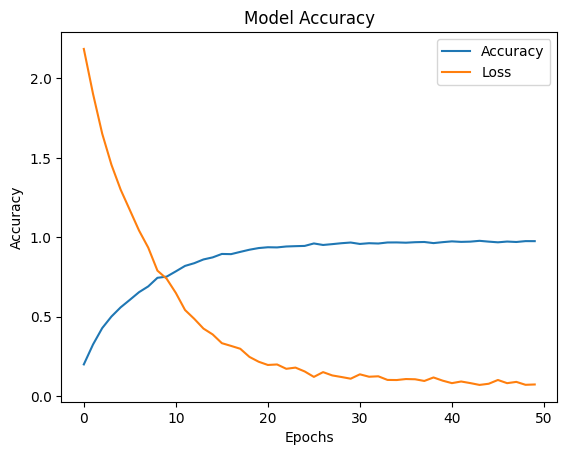

In [ ]:
from matplotlib import pyplot as plt 
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Accuracy','Loss'])
plt.show

In [ ]:
# Lưu lại
model.save("Ktr_VN_Food.h5")

In [ ]:
from tensorflow.keras.models import load_model
# Tải mô hình 
model_CNN=load_model('Ktr_VN_Food.h5')

In [ ]:
from sklearn import preprocessing
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np

1/1 [==============================] - 0s 31ms/step
Xoi xeo


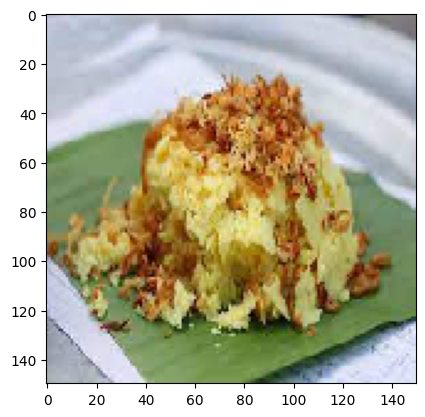

1/1 [==============================] - 0s 27ms/step
Banh xeo


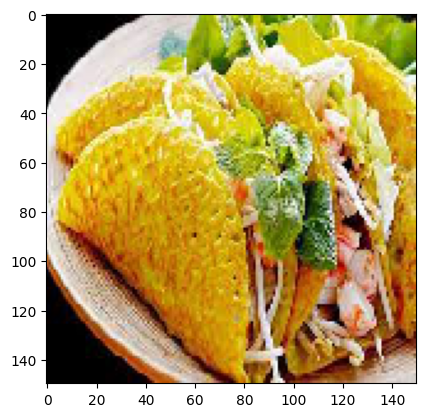

1/1 [==============================] - 0s 30ms/step
Banh xeo


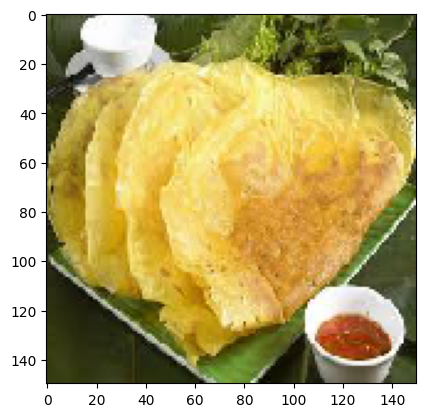

1/1 [==============================] - 0s 34ms/step
Banh pia


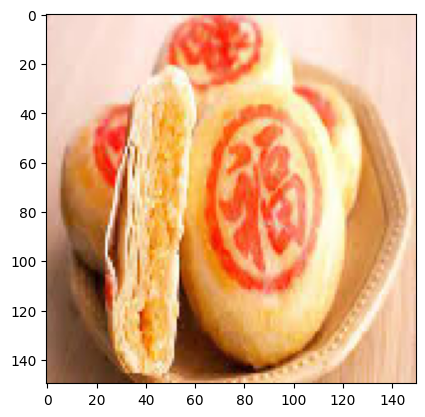

1/1 [==============================] - 0s 28ms/step
Banh pia


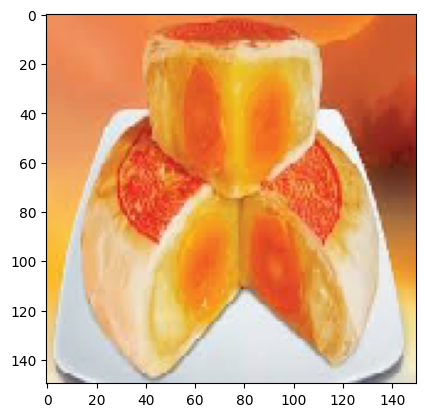

1/1 [==============================] - 0s 36ms/step
Banh mi


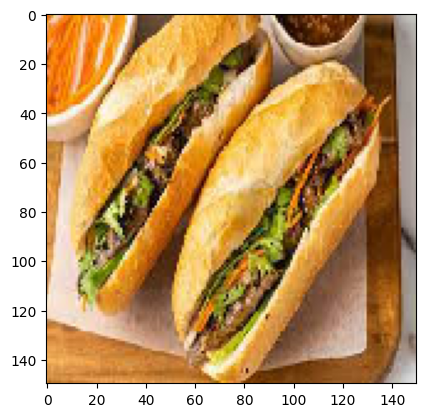

1/1 [==============================] - 0s 27ms/step
Banh mi


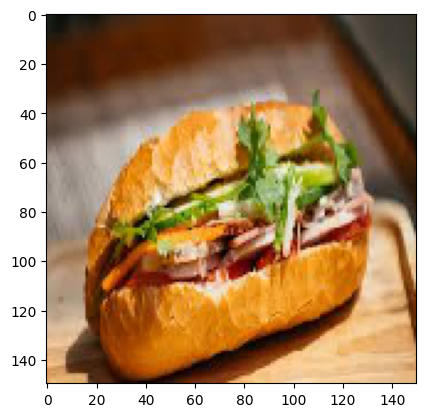

1/1 [==============================] - 0s 28ms/step
Com tam


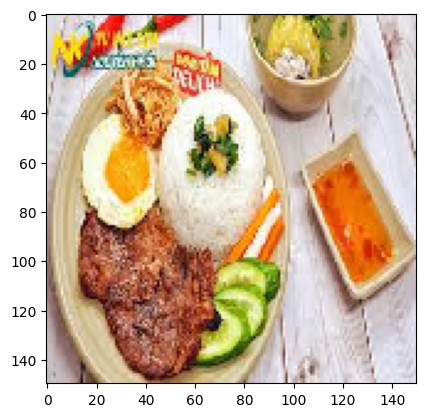

1/1 [==============================] - 0s 30ms/step
Com tam


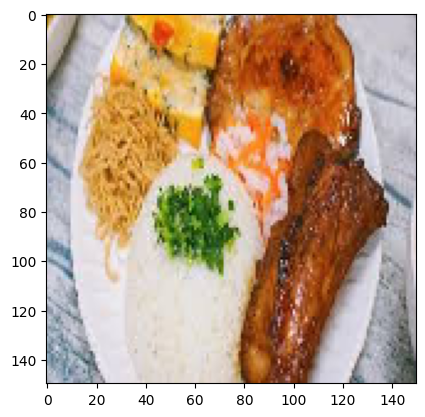

1/1 [==============================] - 0s 22ms/step
Pho


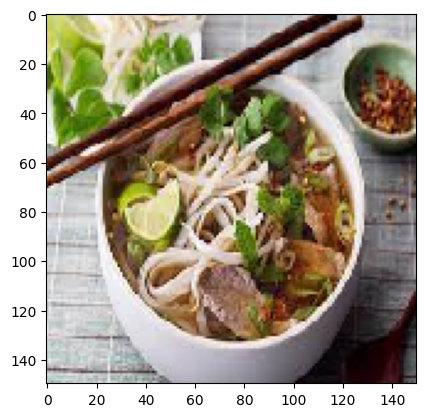

1/1 [==============================] - 0s 22ms/step
Pho


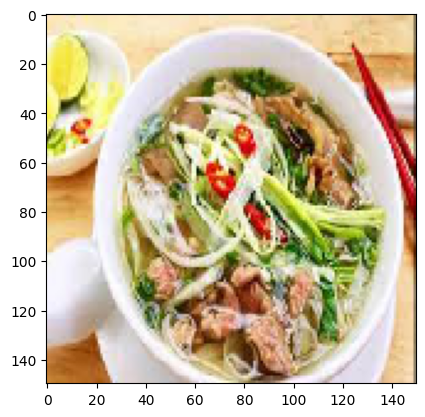

1/1 [==============================] - 0s 29ms/step
Banh chung


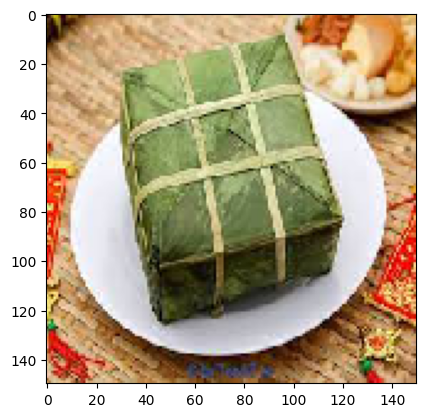

1/1 [==============================] - 0s 37ms/step
Bun rieu


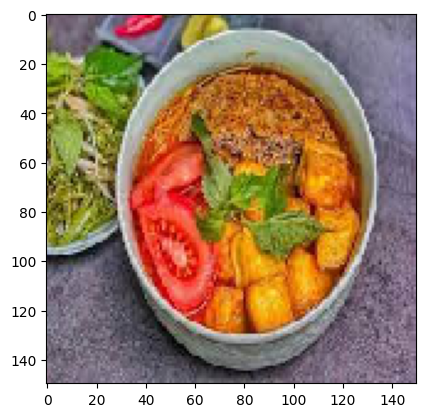

1/1 [==============================] - 0s 39ms/step
Bun rieu


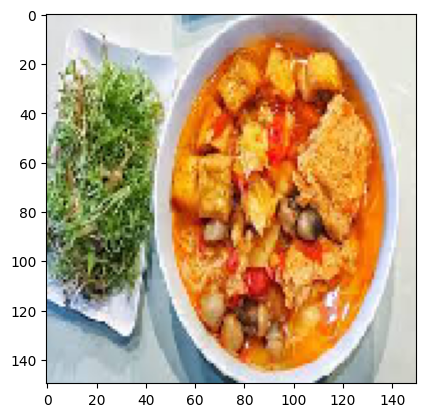

1/1 [==============================] - 0s 28ms/step
Banh beo


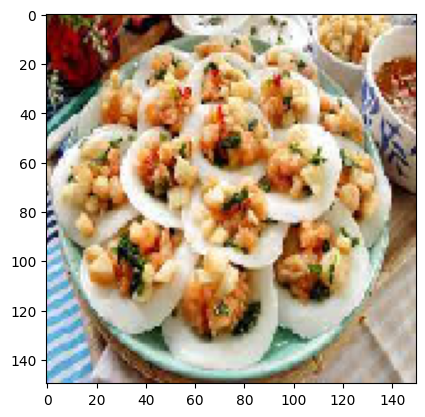

1/1 [==============================] - 0s 22ms/step
Banh chung


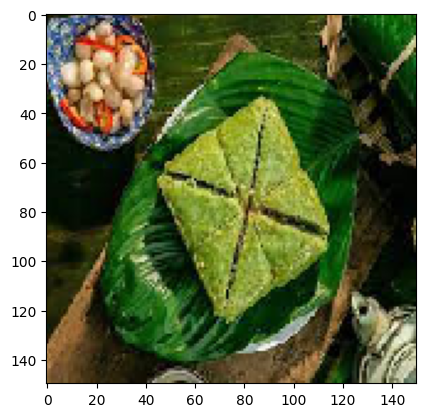

1/1 [==============================] - 0s 19ms/step
Xoi xeo


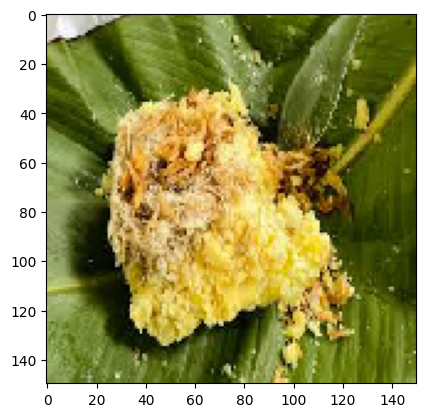

1/1 [==============================] - 0s 20ms/step
Goi cuon


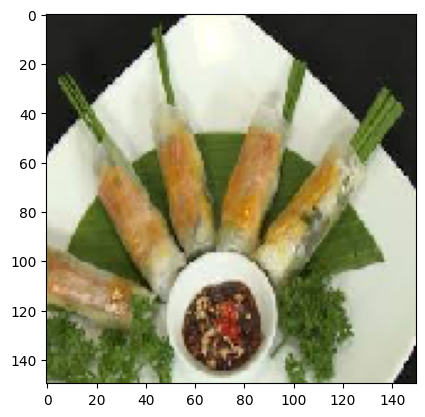

1/1 [==============================] - 0s 20ms/step
Goi cuon


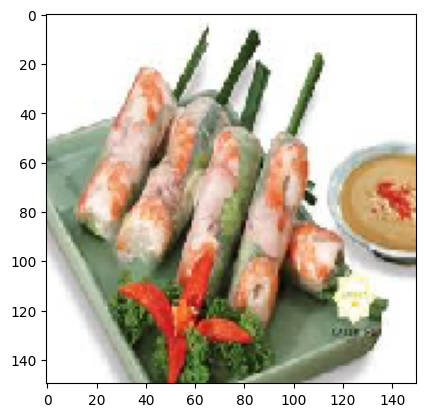

1/1 [==============================] - 0s 19ms/step
Banh beo


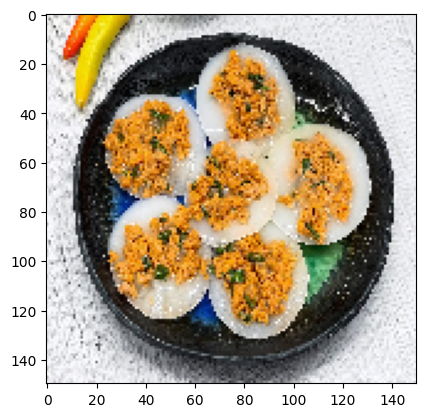

In [ ]:
test="/content/drive/MyDrive/Kiemtra/VN_Food/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_CNN.predict(img),axis =1))

  class_name=['Banh beo','Banh chung','Banh mi','Banh pia','Banh xeo','Bun rieu','Com tam','Goi cuon','Pho','Xoi xeo']
  
  print(class_name[result])
  plt.show()